In [11]:
from collections import Counter
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from DecisionTree import DecisionTree

In [12]:
class RandomForest:
    def __init__(self, n_trees=100, max_depth=10, min_sample_split=2, n_feature=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_sample_split = min_sample_split
        self.n_feature = n_feature
        self.trees = []

    def fit(self, X, y):
        self.trees = []

        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth, 
                                min_samples_split=self.min_sample_split,
                                n_features=self.n_feature)

            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)

            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        prediction = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(prediction, 0, 1)
        predictions = ([self._most_common_label(pred) for pred in tree_preds])
        return predictions

In [13]:
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56) 

Accuracy: 0.9385964912280702
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        46
           1       0.97      0.93      0.95        68

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



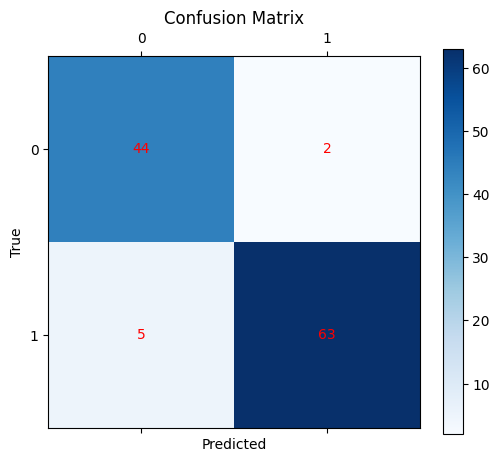

In [17]:
clf = RandomForest()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))


cm = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(6, 5))
cax = ax.matshow(cm, cmap='Blues')
fig.colorbar(cax)
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, val, ha='center', va='center', color='red')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()
